* Ev Fiyatları verilerini Kaggle'dan indirin.
* Verilerinizi eğitim ve test kümelerine ayırın.
* Modelinizi eğitim kümesinden önceki derste olduğu gibi oluşturun. Modelinizin uygunluğunu değerlendirin.
* Test kümesindeki ev fiyatlarını tahmin edin ve bu derste belirttiğimiz metrikleri kullanarak modelinizin performansını değerlendirin.
* Modelinizin performansı tatmin edici mi? Açıklayın.
* Bazı değişkenleri ekleyerek veya çıkararak modelinizi tahmin performansı açısından geliştirmeye çalışın.

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse

%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action="ignore")

In [17]:
ev_fiyat = pd.read_csv('./datasets/ev_fiyatlari.csv')

In [18]:
ev_fiyat_nulls = ev_fiyat.isnull().sum().to_frame('nulls')
ev_fiyat_nulls[ev_fiyat_nulls["nulls"]> 0]

,nulls
LotFrontage,259
Alley,1369
MasVnrType,8
MasVnrArea,8
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1


**Null Kayıtların Temizlenmesi:**

In [19]:
# Basement parameters
ev_fiyat.BsmtQual.fillna("NA", inplace = True)
ev_fiyat.BsmtCond.fillna("NA", inplace = True)
ev_fiyat.BsmtExposure.fillna("NA", inplace = True)
ev_fiyat.BsmtFinType1.fillna("NA", inplace = True)
ev_fiyat.BsmtFinType2.fillna("NA", inplace = True)

# Garage Parameters
ev_fiyat.GarageType.fillna("NA", inplace = True)
ev_fiyat.GarageYrBlt.fillna("NA", inplace = True)
ev_fiyat.GarageFinish.fillna("NA", inplace = True)
ev_fiyat.GarageQual.fillna("NA", inplace = True)
ev_fiyat.GarageCond.fillna("NA", inplace = True)


#LotFrontage Parameter
ev_fiyat.LotFrontage.fillna(ev_fiyat.LotFrontage.mean(), inplace = True)

#Alley Parameter
ev_fiyat.Alley.fillna("NA", inplace = True)

#MasVnrType Parameter
ev_fiyat.MasVnrType.fillna("None", inplace = True)

#MasVnrArea Parameter
ev_fiyat.MasVnrArea.fillna(0.0, inplace = True)

#Electrical Parameter
ev_fiyat.Electrical.fillna(ev_fiyat.Electrical.value_counts().index[0], inplace = True) 

#FireplaceQu Parameter
ev_fiyat.FireplaceQu.fillna("NA", inplace = True)

#PoolQC Parameter
ev_fiyat.PoolQC.fillna("NA", inplace = True)

#Fence
ev_fiyat.Fence.fillna("NA", inplace = True)

#MiscFeature
ev_fiyat.MiscFeature.fillna("NA", inplace = True)

In [20]:
del ev_fiyat['GarageYrBlt']
categorical_feature_mask = ev_fiyat.dtypes==object
categorical_cols = ev_fiyat.columns[categorical_feature_mask].tolist()

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [22]:
ev_fiyat[categorical_cols] = ev_fiyat[categorical_cols].apply(lambda col: le.fit_transform(col))

In [23]:
Y = ev_fiyat['SalePrice']
X = ev_fiyat[['CentralAir','Electrical','ExterQual','Street','OverallQual', 
                  'YearRemodAdd', 'Fireplaces','TotalBsmtSF']]

lrm = linear_model.LinearRegression()
lrm.fit(X, Y)

print('Değişkenler: \n', lrm.coef_)
print('Sabit değer (bias): \n', lrm.intercept_)

Değişkenler: 
 [  3509.99504984    395.50774001 -20820.09002268  21331.38663336
  25393.19795423    347.10120066  20659.06853358     37.7282137 ]
Sabit değer (bias): 
 -688572.7607308154


In [24]:
import statsmodels.api as sm

X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     471.1
Date:                Tue, 31 Dec 2019   Prob (F-statistic):               0.00
Time:                        17:27:46   Log-Likelihood:                -17609.
No. Observations:                1460   AIC:                         3.524e+04
Df Residuals:                    1451   BIC:                         3.528e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -6.886e+05   1.36e+05     -5.069      0.000   -9.55e+05   -4.22e+05
CentralAir    3509.9950   4940.227      0.710      0.478   -6180.756    1.32e+04
Electrical     395.5077   1148.661      0.344      0.731   -1857.706    2648.722
ExterQual    -2.082e+04   2173.451     -9.579      0.000   -2.51e+04   -1.66e+04
Street        2.133e+04   1.74e+04      1.227      0.220   -1.28e+04    5.54e+04
OverallQual   2.539e+04   1249.241     20.327      0.000    2.29e+04    2.78e+04
YearRemodAdd   347.1012     69.447      4.998      0.000     210.873     483.329
Fireplaces    2.066e+04   1914.998     10.788      0.000    1.69e+04    2.44e+04
TotalBsmtSF     37.7282      3.071     12.284      0.000      31.703      43.753
==============================================================================
Omnibus:                      530.775   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20278.056
Skew:                           0.993   Prob(JB):                         0.00
Kurtosis:                      21.149   Cond. No.                     2.79e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.79e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("Eğitim kümesindeki gözlem sayısı : {}".format(X_train.shape[0]))
print("Test kümesindeki gözlem sayısı   : {}".format(X_test.shape[0]))

Eğitim kümesindeki gözlem sayısı : 1168
Test kümesindeki gözlem sayısı   : 292


In [26]:
X_train = sm.add_constant(X_train)

sonuclar = sm.OLS(y_train, X_train).fit()

sonuclar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     365.8
Date:                Tue, 31 Dec 2019   Prob (F-statistic):          1.00e-310
Time:                        17:27:55   Log-Likelihood:                -14077.
No. Observations:                1168   AIC:                         2.817e+04
Df Residuals:                    1159   BIC:                         2.822e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -6.523e+05   1.51e+05     -4.322      0.000   -9.48e+05   -3.56e+05
CentralAir    3697.7348   5372.298      0.688      0.491   -6842.783    1.42e+04
Electrical       1.7440   1250.300      0.001      0.999   -2451.360    2454.848
ExterQual     -2.02e+04   2434.052     -8.297      0.000    -2.5e+04   -1.54e+04
Street        7201.6289   1.89e+04      0.382      0.703   -2.98e+04    4.42e+04
OverallQual   2.665e+04   1394.938     19.103      0.000    2.39e+04    2.94e+04
YearRemodAdd   335.2634     77.208      4.342      0.000     183.780     486.747
Fireplaces    2.119e+04   2114.386     10.023      0.000     1.7e+04    2.53e+04
TotalBsmtSF     31.0657      3.390      9.164      0.000      24.415      37.717
==============================================================================
Omnibus:                      354.818   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12122.577
Skew:                           0.720   Prob(JB):                         0.00
Kurtosis:                      18.717   Cond. No.                     2.80e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.8e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

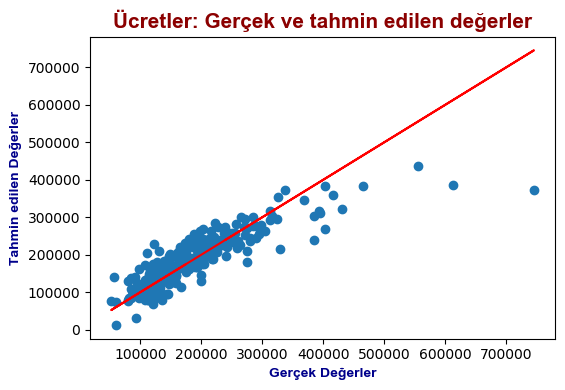

Ortalama Mutlak Hata (MAE)        : 27876.59736928368
Ortalama Kare Hata (MSE)          : 1920972667.579982
Kök Ortalama Kare Hata (RMSE)     : 43828.9021945563
Ortalama Mutlak Yüzde Hata (MAPE) : 16.17469378194708


In [15]:
X_test = sm.add_constant(X_test)

y_preds = sonuclar.predict(X_test)


baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }
plt.figure(dpi = 100)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Gerçek Değerler", fontdict=eksen_font)
plt.ylabel("Tahmin edilen Değerler", fontdict=eksen_font)
plt.title("Ücretler: Gerçek ve tahmin edilen değerler", fontdict=baslik_font)
plt.show()

print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(y_test, y_preds)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test, y_preds)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test, y_preds)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

**Model 2 (CentralAir, Electrical, Street Özelliklerinin kaldırılması)**

In [27]:
Y = ev_fiyat['SalePrice']
X = ev_fiyat[['ExterQual','OverallQual', 
                  'YearRemodAdd', 'Fireplaces','TotalBsmtSF']]

lrm = linear_model.LinearRegression()
lrm.fit(X, Y)

print('Değişkenler: \n', lrm.coef_)
print('Sabit değer (bias): \n', lrm.intercept_)

Değişkenler: 
 [-20178.97140092  25657.22516738    369.8230829   20773.25435411
     37.94481889]
Sabit değer (bias): 
 -711228.6759159762


In [28]:
import statsmodels.api as sm

X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     753.7
Date:                Tue, 31 Dec 2019   Prob (F-statistic):               0.00
Time:                        17:30:01   Log-Likelihood:                -17611.
No. Observations:                1460   AIC:                         3.523e+04
Df Residuals:                    1454   BIC:                         3.526e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -7.112e+05    1.3e+05     -5.491      0.000   -9.65e+05   -4.57e+05
ExterQual    -2.018e+04   2125.333     -9.494      0.000   -2.43e+04    -1.6e+04
OverallQual   2.566e+04   1235.579     20.765      0.000    2.32e+04    2.81e+04
YearRemodAdd   369.8231     65.787      5.622      0.000     240.775     498.871
Fireplaces    2.077e+04   1902.954     10.916      0.000     1.7e+04    2.45e+04
TotalBsmtSF     37.9448      3.058     12.410      0.000      31.947      43.943
==============================================================================
Omnibus:                      525.164   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20160.669
Skew:                           0.973   Prob(JB):                         0.00
Kurtosis:                      21.100   Cond. No.                     2.66e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.66e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("Eğitim kümesindeki gözlem sayısı : {}".format(X_train.shape[0]))
print("Test kümesindeki gözlem sayısı   : {}".format(X_test.shape[0]))

Eğitim kümesindeki gözlem sayısı : 1168
Test kümesindeki gözlem sayısı   : 292


In [30]:
X_train = sm.add_constant(X_train)

sonuclar = sm.OLS(y_train, X_train).fit()

sonuclar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     586.4
Date:                Tue, 31 Dec 2019   Prob (F-statistic):          1.11e-314
Time:                        17:30:34   Log-Likelihood:                -14077.
No. Observations:                1168   AIC:                         2.817e+04
Df Residuals:                    1162   BIC:                         2.820e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -6.704e+05   1.44e+05     -4.643      0.000   -9.54e+05   -3.87e+05
ExterQual    -1.984e+04   2389.381     -8.302      0.000   -2.45e+04   -1.51e+04
OverallQual   2.681e+04   1376.747     19.475      0.000    2.41e+04    2.95e+04
YearRemodAdd   348.6590     73.432      4.748      0.000     204.585     492.733
Fireplaces    2.131e+04   2097.685     10.161      0.000    1.72e+04    2.54e+04
TotalBsmtSF     31.1928      3.378      9.235      0.000      24.566      37.819
==============================================================================
Omnibus:                      352.779   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12140.407
Skew:                           0.709   Prob(JB):                         0.00
Kurtosis:                      18.731   Cond. No.                     2.68e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.68e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

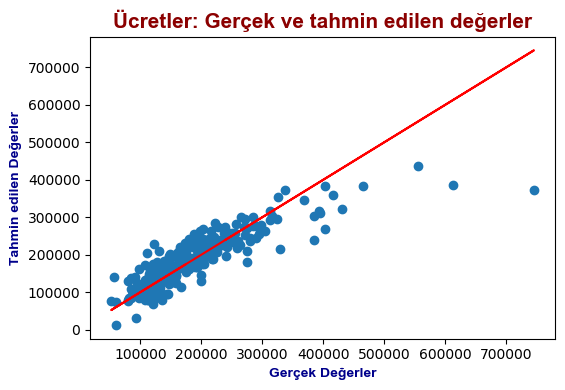

Ortalama Mutlak Hata (MAE)        : 27876.59736928368
Ortalama Kare Hata (MSE)          : 1920972667.579982
Kök Ortalama Kare Hata (RMSE)     : 43828.9021945563
Ortalama Mutlak Yüzde Hata (MAPE) : 16.17469378194708


In [31]:
X_test = sm.add_constant(X_test)

y_preds = sonuclar.predict(X_test)


baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }
plt.figure(dpi = 100)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Gerçek Değerler", fontdict=eksen_font)
plt.ylabel("Tahmin edilen Değerler", fontdict=eksen_font)
plt.title("Ücretler: Gerçek ve tahmin edilen değerler", fontdict=baslik_font)
plt.show()

print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(y_test, y_preds)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test, y_preds)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test, y_preds)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

**Model 3 (GrLivArea Özelliğinin Eklenmesi)**

In [32]:
Y = ev_fiyat['SalePrice']
X = ev_fiyat[['ExterQual','OverallQual', 
                  'YearRemodAdd', 'Fireplaces','TotalBsmtSF','GrLivArea']]

lrm = linear_model.LinearRegression()
lrm.fit(X, Y)

print('Değişkenler: \n', lrm.coef_)
print('Sabit değer (bias): \n', lrm.intercept_)

Değişkenler: 
 [-18598.58648752  18681.47005408    400.51767399  11692.33072401
     30.31278296     45.30483329]
Sabit değer (bias): 
 -788640.4950737257


In [33]:
import statsmodels.api as sm

X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     824.1
Date:                Tue, 31 Dec 2019   Prob (F-statistic):               0.00
Time:                        17:32:39   Log-Likelihood:                -17462.
No. Observations:                1460   AIC:                         3.494e+04
Df Residuals:                    1453   BIC:                         3.497e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -7.886e+05   1.17e+05     -6.734      0.000   -1.02e+06   -5.59e+05
ExterQual     -1.86e+04   1922.276     -9.675      0.000   -2.24e+04   -1.48e+04
OverallQual   1.868e+04   1180.942     15.819      0.000    1.64e+04     2.1e+04
YearRemodAdd   400.5177     59.465      6.735      0.000     283.872     517.164
Fireplaces    1.169e+04   1790.974      6.528      0.000    8179.160    1.52e+04
TotalBsmtSF     30.3128      2.795     10.847      0.000      24.831      35.795
GrLivArea       45.3048      2.501     18.113      0.000      40.398      50.211
==============================================================================
Omnibus:                      612.192   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            73588.347
Skew:                          -0.930   Prob(JB):                         0.00
Kurtosis:                      37.731   Cond. No.                     3.24e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.24e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("Eğitim kümesindeki gözlem sayısı : {}".format(X_train.shape[0]))
print("Test kümesindeki gözlem sayısı   : {}".format(X_test.shape[0]))

Eğitim kümesindeki gözlem sayısı : 1168
Test kümesindeki gözlem sayısı   : 292


In [35]:
X_train = sm.add_constant(X_train)

sonuclar = sm.OLS(y_train, X_train).fit()

sonuclar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     631.7
Date:                Tue, 31 Dec 2019   Prob (F-statistic):               0.00
Time:                        17:33:01   Log-Likelihood:                -13966.
No. Observations:                1168   AIC:                         2.795e+04
Df Residuals:                    1161   BIC:                         2.798e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -7.618e+05   1.31e+05     -5.796      0.000   -1.02e+06   -5.04e+05
ExterQual    -1.803e+04   2175.712     -8.288      0.000   -2.23e+04   -1.38e+04
OverallQual   1.996e+04   1326.328     15.051      0.000    1.74e+04    2.26e+04
YearRemodAdd   386.7245     66.815      5.788      0.000     255.632     517.817
Fireplaces    1.212e+04   1995.941      6.075      0.000    8208.660     1.6e+04
TotalBsmtSF     23.6506      3.109      7.608      0.000      17.551      29.750
GrLivArea       43.5982      2.789     15.633      0.000      38.126      49.070
==============================================================================
Omnibus:                      525.256   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            51116.133
Skew:                          -1.114   Prob(JB):                         0.00
Kurtosis:                      35.332   Cond. No.                     3.26e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.26e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

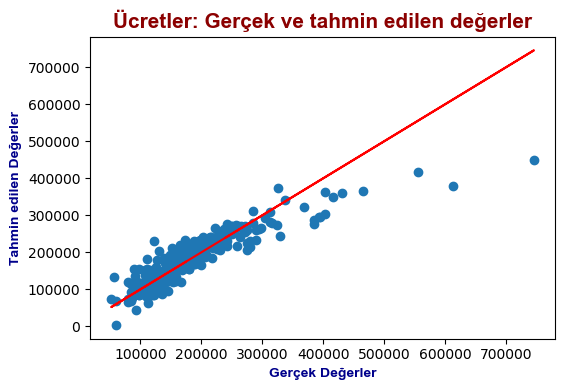

Ortalama Mutlak Hata (MAE)        : 25545.719823528467
Ortalama Kare Hata (MSE)          : 1510968176.8499656
Kök Ortalama Kare Hata (RMSE)     : 38871.174112058485
Ortalama Mutlak Yüzde Hata (MAPE) : 14.92304929944506


In [36]:
X_test = sm.add_constant(X_test)

y_preds = sonuclar.predict(X_test)


baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }
plt.figure(dpi = 100)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Gerçek Değerler", fontdict=eksen_font)
plt.ylabel("Tahmin edilen Değerler", fontdict=eksen_font)
plt.title("Ücretler: Gerçek ve tahmin edilen değerler", fontdict=baslik_font)
plt.show()

print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(y_test, y_preds)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test, y_preds)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test, y_preds)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

**Modellerin Karşılaştırılması:**

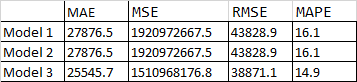

İncelediğimiz 3 Model için MAE, MSE, RMSE ve MAPE değerlerini kontrol ettiğimizde Model 1 içerisinde yer alan ve p değeri 0.05'in çok üzerinde olan CentralAir, Electrical, Street özellikleri çıkarmamıza rağmen Model 1 ve Model 2 arasında MAE, MSE, RMSE ve MAPE değerlerinde herhangi bir değişim olmadı. Model 3'e yeni bir özellik olan GrLivArea ekledikten sonra yaptığımız testte Model 1 ve 2 ye göre tüm MAE, MSE, RMSE ve MAPE değerlerinin azaldığı görüyoruz. Bu da bize Model 3 en iyi modelimiz olduğunu gösteriyor